In [1]:
%config Completer.use_jedi = False
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np

In [3]:
from wm import Image as Image
from wm.moments import RadialHarmonicFourierMoment
from wm.moments import ZernikeMoment
from wm.moments import PseudoZernikeMoment

In [4]:
w = np.random.randint(2, size=16)

## RHFM

In [5]:
N = 128
order = 32
im = Image('lena_'+str(N)+'.png')
RHFM = RadialHarmonicFourierMoment(order, N)

In [6]:
%%time
E = RHFM.encode(im.grey, w, verbose=True)

CPU times: user 4.47 s, sys: 136 ms, total: 4.61 s
Wall time: 4.51 s


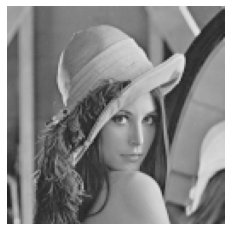

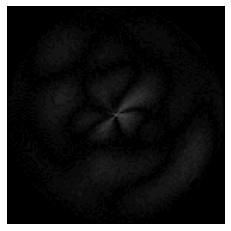

In [7]:
E.show()
imdiff = np.abs(im.grey.im.astype('float16') - E.im.astype('float16')).astype('uint16')
II = Image(10*imdiff, colored=False)
II.show()

In [8]:
%%time
w2 = RHFM.decode(E, pos=len(w), verbose=True)
print(w)
print(np.array(w2))

[0 0 0 1 0 0 1 1 0 1 0 1 0 0 0 0]   
[0 0 0 1 0 0 1 1 0 1 0 1 0 0 0 0]
CPU times: user 305 ms, sys: 20.2 ms, total: 325 ms
Wall time: 311 ms


## ZM

In [9]:
N = 64
order = 16
im = Image('lena_'+str(N)+'.png')
ZM = ZernikeMoment(order, N)

In [10]:
%%time
E = ZM.encode(im.grey, w, verbose=True)

CPU times: user 2.01 s, sys: 72.5 ms, total: 2.08 s
Wall time: 2.01 s


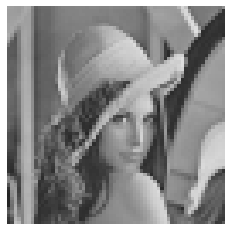

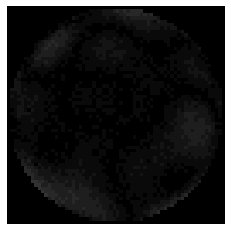

In [11]:
E.show()
imdiff = np.abs(im.grey.im.astype('float16') - E.im.astype('float16')).astype('uint16')
II = Image(10*imdiff, colored=False)
II.show()

In [12]:
%%time
w2 = ZM.decode(E, pos=len(w), verbose=True)
print(w)
print(np.array(w2))

[0 0 0 1 0 0 1 1 0 1 0 1 0 0 0 0]    
[0 0 0 1 0 0 1 1 0 1 0 1 0 0 0 0]
CPU times: user 792 ms, sys: 7.66 ms, total: 799 ms
Wall time: 790 ms


## PZM

In [13]:
N = 64
order = 16
im = Image('lena_'+str(N)+'.png')
PZM = PseudoZernikeMoment(order, N)

In [14]:
%%time
E = PZM.encode(im.grey, w, verbose=True)

CPU times: user 3.68 s, sys: 38.5 ms, total: 3.72 s
Wall time: 3.64 s


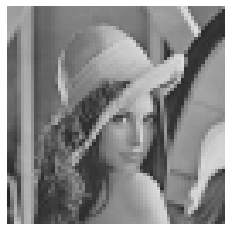

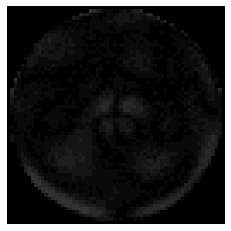

In [15]:
E.show()
imdiff = np.abs(im.grey.im.astype('float16') - E.im.astype('float16')).astype('uint16')
II = Image(10*imdiff, colored=False)
II.show()

In [16]:
%%time
w2 = PZM.decode(E, pos=len(w), verbose=True)
print(w)
print(np.array(w2))

[0 0 0 1 0 0 1 1 0 1 0 1 0 0 0 0]    
[0 0 0 1 0 0 1 1 0 1 0 1 0 0 0 0]
CPU times: user 1.45 s, sys: 0 ns, total: 1.45 s
Wall time: 1.44 s
